In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [78]:
%reset

In [ ]:
# path = "C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Exchange/Course/Predictive Analytics/Group assignment/DBA3803/Data"
# os.chdir(path)
print(os.getcwd())

C:\Users\megar\OneDrive\Documenten\Business Analytics Management\Exchange\Course\Predictive Analytics\Group assignment\DBA3803\Data


In [4]:
df = pd.read_csv('flights_final.csv')

In [5]:
# Create a subset
# Randomly sample 1/6th of the data
sub_df = df.sample(frac=1/6, random_state=420).reset_index(drop=True)
print(sub_df.shape)

(969846, 31)


In [6]:
pd.set_option('display.max_columns', None)
print(sub_df.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      3    8            7      B6            163      N562JB   
1  2015     11    7            6      WN           2746      N373SW   
2  2015      8   14            5      NK            230      N521NK   
3  2015     11   30            1      AA           2451      N3FRAA   
4  2015      6   17            3      US            625      N802AW   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            JFK                 SRQ                  751           746.0   
1            LAS                 SFO                 1545          1546.0   
2            FLL                 ATL                 2140          2138.0   
3            CLT                 DFW                  600           557.0   
4            PHX                 BOI                  940           934.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0             -5.0      15.0       8

In [7]:
sub_df = sub_df.drop(['YEAR', 'TAIL_NUMBER', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print(sub_df.head(2)) 

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      3    8            7      B6            163            JFK   
1     11    7            6      WN           2746            LAS   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
0                 SRQ                  751             -5.0           186.0   
1                 SFO                 1545              1.0            95.0   

   DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
0      1041               1057          -14.0          0  
1       414               1720          -13.0          0  


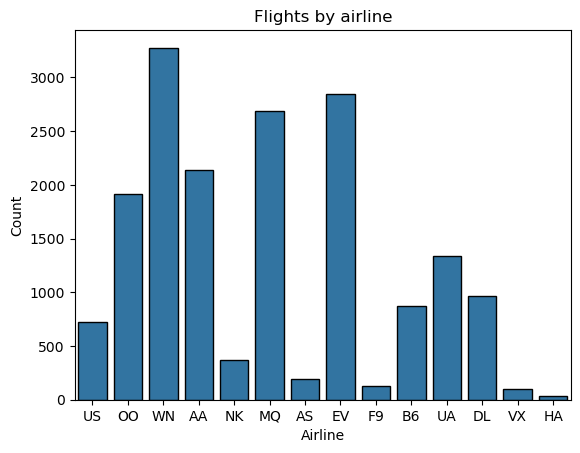

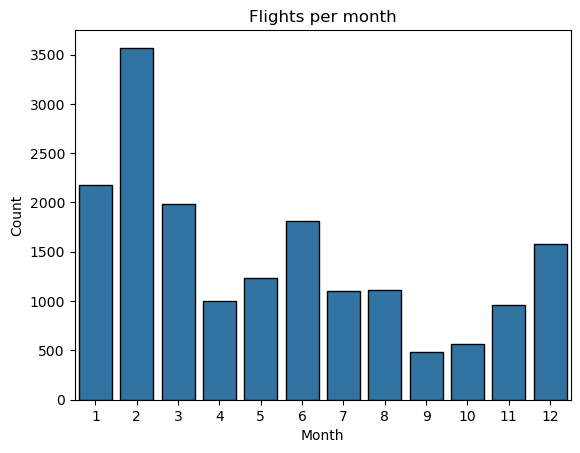

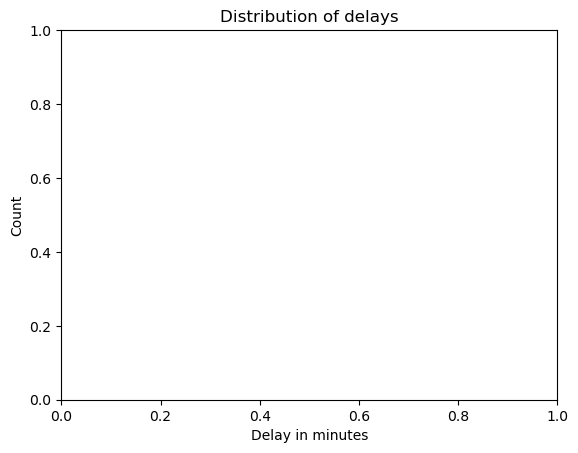

    MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
51      2   26            4      US           2042            CLT   
75     12   11            5      OO           4796            SUN   
88      3    3            2      WN            338            LAS   

   DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
51                 JFK                  734              NaN           105.0   
75                 SLC                 1305              NaN            62.0   
88                 SAN                 1705              NaN            65.0   

    DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
51       541                919            NaN          1  
75       222               1407            NaN          1  
88       258               1810            NaN          1  
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_

In [9]:
sub_df_1 = sub_df[sub_df['ARRIVAL_DELAY'].isna()]

sns.countplot(data=sub_df_1, x='AIRLINE', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flights by airline')
plt.show()

sns.countplot(data=sub_df_1, x='MONTH', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flights per month')
plt.show()

# plot the delayed in minutes
sns.histplot(data=sub_df_1, x='ARRIVAL_DELAY', bins=100, color="#1f77b4", edgecolor='black')
plt.xlabel('Delay in minutes')
plt.ylabel('Count')
plt.title('Distribution of delays')
plt.show()

print(sub_df_1.head(3)) 

# na in ARRIVAL_DELAY and DEPARTURE_DELAY will be dropped as they regard cancelled flights

sub_df_2 = sub_df[sub_df['CANCELLED'] != 1]
sub_df_2 = sub_df_2.dropna(subset=['ARRIVAL_DELAY'])
print(sub_df_2.isnull().sum())

In [10]:
# Binary variable for 'Flight_delayed'
sub_df_2['departure_delayed'] = sub_df_2['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
sub_df_2['arrival_delayed'] = sub_df_2['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
print(sub_df_2.head(10))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      3    8            7      B6            163            JFK   
1     11    7            6      WN           2746            LAS   
2      8   14            5      NK            230            FLL   
3     11   30            1      AA           2451            CLT   
4      6   17            3      US            625            PHX   
5      1   14            3      MQ           3468            ORD   
6      3   15            7      WN           4192            MSY   
7      8    7            5      OO           6325            SAN   
8      1   14            3      UA            745            PHX   
9      1   20            2      DL           2416            PIT   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
0                 SRQ                  751             -5.0           186.0   
1                 SFO                 1545              1.0            95.0   
2             

In [11]:
# Counting number of occurences grouped by Month and Day
def assign_flight_counts(sub_df_2):
    # Deaprtures
    departure_counts = sub_df_2.groupby(['MONTH', 'DAY', 'ORIGIN_AIRPORT']).size().reset_index(name='NUM_DEPARTURES')

    # Arrivals
    arrival_counts = sub_df_2.groupby(['MONTH', 'DAY', 'DESTINATION_AIRPORT']).size().reset_index(name='NUM_ARRIVALS')

    # Merging back to original dataframe (Departures)
    sub_df_2 = pd.merge(sub_df_2, departure_counts, how='left', on=['MONTH', 'DAY', 'ORIGIN_AIRPORT'])

    # Merging back to original dataframe (Arrivals)
    sub_df_2 = pd.merge(sub_df_2, arrival_counts, how='left', on=['MONTH', 'DAY', 'DESTINATION_AIRPORT'])

    return sub_df_2

sub_df_3 = assign_flight_counts(sub_df_2)

# Reordering columns
cols = sub_df_3.columns.tolist()  # Get the current column order as a list

# Getting index of origin and destination airport for location
origin_index = cols.index('ORIGIN_AIRPORT')
destination_index = cols.index('DESTINATION_AIRPORT')

# Removing duplicated
cols = [col for col in cols if col not in ['NUM_DEPARTURES', 'NUM_ARRIVALS']]

# Insert 'num_departures' after 'ORIGIN_AIRPORT'
cols.insert(origin_index + 1, 'NUM_DEPARTURES') # +1 for correct location

# Insert 'num_arrivals' after 'DESTINATION_AIRPORT'
cols.insert(destination_index + 2, 'NUM_ARRIVALS') # +2 for correct location

sub_df_3 = sub_df_3[cols]

print(sub_df_3.head(3))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      3    8            7      B6            163            JFK   
1     11    7            6      WN           2746            LAS   
2      8   14            5      NK            230            FLL   

   NUM_DEPARTURES DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  \
0              53                 SRQ             4                  751   
1              63                 SFO            67                 1545   
2              27                 ATL           200                 2140   

   DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  \
0             -5.0           186.0      1041               1057   
1              1.0            95.0       414               1720   
2             -2.0           103.0       581               2323   

   ARRIVAL_DELAY  CANCELLED  departure_delayed  arrival_delayed  
0          -14.0          0                  0                0  
1          -13.0     

In [12]:
def calculate_day_of_year(row):
    date = datetime.datetime(year=2015, month=row['MONTH'], day=row['DAY'])  
    return date.timetuple().tm_yday  

sub_df_3['DAY_OF_YEAR'] = sub_df_3.apply(calculate_day_of_year, axis=1)

In [13]:
print(sub_df_3.head(6))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      3    8            7      B6            163            JFK   
1     11    7            6      WN           2746            LAS   
2      8   14            5      NK            230            FLL   
3     11   30            1      AA           2451            CLT   
4      6   17            3      US            625            PHX   
5      1   14            3      MQ           3468            ORD   

   NUM_DEPARTURES DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  \
0              53                 SRQ             4                  751   
1              63                 SFO            67                 1545   
2              27                 ATL           200                 2140   
3              56                 DFW           128                  600   
4              59                 BOI            11                  940   
5             127                 BMI             4                

In [24]:
# Perform one-hot encoding
categorical_cols = ['AIRLINE'
                   #,'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
                    ]
df_encoded = pd.get_dummies(sub_df_3, columns=categorical_cols, drop_first=True)
print(df_encoded.shape)
print(df_encoded.head(6))

(952251, 31)
   MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER ORIGIN_AIRPORT  NUM_DEPARTURES  \
0      3    8            7            163            JFK              53   
1     11    7            6           2746            LAS              63   
2      8   14            5            230            FLL              27   
3     11   30            1           2451            CLT              56   
4      6   17            3            625            PHX              59   
5      1   14            3           3468            ORD             127   

  DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  \
0                 SRQ             4                  751             -5.0   
1                 SFO            67                 1545              1.0   
2                 ATL           200                 2140             -2.0   
3                 DFW           128                  600             -3.0   
4                 BOI            11                  940             

# Model making

In the above part the datafram df_encoded is made to train the model on. On the next part we will predict the amount of time a flight is delayed usng 'DEPARRTURE_DELAY'.

For evaluation the RMSE and R^2 is used.

The whole dataset is too big so for the next part the I will use the 20%


In [ ]:
# df_small = df_encoded.sample(frac=0.1, random_state=420)  # Sample 10% of data

# Classification model
At first I will take a look at the classification models: Knn, Lasso, Decision tree.

We will also make use of CV fold to tune the parameters. This is important to get the best model.

For the model the Y is always the same: 'departure_delayed' and X the rest of the predictors: MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, SCHEDULED_TIME, DISTANCE, SCHEDULED_ARRIVAL, ARRIVAL_DELAY, CANCELLED.

In [14]:
# Setup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = sub_df_3.drop(columns=['DEPARTURE_DELAY', 'departure_delayed','arrival_delayed', 'ARRIVAL_DELAY','AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLED'])
y = sub_df_3['departure_delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [ ]:
# Lasso classification model (logistic)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=420)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.6300529270922304


In [16]:
# KNN model with cv parameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# grid of 5 to 25 neighbors with steps of 5
param_grid = {'n_neighbors': np.arange(5, 11, 5)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model
knn_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))


# Predict the test set
y_pred = knn_cv.predict(X_test)

# Compute and print metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# save the results for comparison with other models
results = classification_report(y_test, y_pred, output_dict=True)
results_df = pd.DataFrame(results).transpose()


C:\Users\megar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\megar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Tuned KNN Parameters: {'n_neighbors': 10}
Best score is 0.6498833589618572


C:\Users\megar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.68      0.86      0.76    179631
           1       0.56      0.30      0.39    106045

    accuracy                           0.65    285676
   macro avg       0.62      0.58      0.58    285676
weighted avg       0.63      0.65      0.62    285676

[[154588  25043]
 [ 73946  32099]]


In [17]:
# Decision tree classification
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=420)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Compute and print metrics
print(classification_report(y_test, y_pred))

# Accuracy
print(accuracy_score(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# save the results for comparison with other models
results = classification_report(y_test, y_pred, output_dict=True)
results_df = pd.concat([results_df, pd.DataFrame(results).transpose()])

              precision    recall  f1-score   support

           0       0.68      0.67      0.68    179631
           1       0.45      0.47      0.46    106045

    accuracy                           0.59    285676
   macro avg       0.57      0.57      0.57    285676
weighted avg       0.60      0.59      0.60    285676

0.5945441689186352
[[120413  59218]
 [ 56611  49434]]


In [18]:
# XGboost classification
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=420)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# Compute and print metrics
print(classification_report(y_test, y_pred))

# Accuracy
print(accuracy_score(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77    179631
           1       0.62      0.37      0.46    106045

    accuracy                           0.68    285676
   macro avg       0.66      0.62      0.62    285676
weighted avg       0.67      0.68      0.66    285676

0.6796860779344432
[[155326  24305]
 [ 67201  38844]]


# Continuous prediction of the delay time
Second we will look at a continous prediction model of the delay departure time using the following models: XGboost , Lasso model, Random Forest.

For the model the Y is always the same: 'DEPARTURE DELAY' and X the rest of the predictors: MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, SCHEDULED_TIME, DISTANCE, SCHEDULED_ARRIVAL, ARRIVAL_DELAY, CANCELLED.

In [25]:
# Setup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df_encoded.drop(columns=['DEPARTURE_DELAY', 'departure_delayed','arrival_delayed', 'ARRIVAL_DELAY', 
                           'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLED'])
y = df_encoded['DEPARTURE_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [20]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize the model
gb_reg_dep_del = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)

# Fit the model
gb_reg_dep_del.fit(X_train, y_train)

# Make predictions
y_pred_dep_del = gb_reg_dep_del.predict(X_test)

# Evaluate
mse_dep_del = mean_squared_error(y_test, y_pred_dep_del)
rmse_dep_del = np.sqrt(mse_dep_del)
r2_dep_del = r2_score(y_test, y_pred_dep_del)

# Print evaluation metrics
print(f"Gradient Boosting RMSE for 'departure_delay': {rmse_dep_del}")
print(f"Gradient Boosting R² Score for 'departure_delay': {r2_dep_del}")

Gradient Boosting RMSE for 'departure_delay': 35.84873437101866
Gradient Boosting R² Score for 'departure_delay': 0.04527010544775345


In [ ]:
# what is the average delay
print(f"Average delay: {y.mean()}")
# variation
print(f"Standard deviation: {y.std()}")

Average delay: 9.256159352943708


In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeRegressor
# #GB Cross-Validation
# cv_scores_gb = cross_val_score(gb_reg_dep_del, X_dep_del, y_dep_del, cv=5, scoring='r2')

# # Print the cross-validation scores and their mean
# print("Gradient Boosting Regressor Cross-Validation R^2 Scores:", cv_scores_gb)
# print("Average Cross-Validation R^2 Score for Gradient Boosting:", cv_scores_gb.mean())

KeyboardInterrupt: 

In [26]:
#KNN 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN Regressor
knn_reg_dep_del = KNeighborsRegressor(n_neighbors=5)
# Fit the model

knn_reg_dep_del.fit(X_train, y_train)

# Make predictions
y_pred_knn_dep_del = knn_reg_dep_del.predict(X_test)

# Evaluate the model
mse_knn_dep_del = mean_squared_error(y_test, y_pred_knn_dep_del)
rmse_knn_dep_del = np.sqrt(mse_knn_dep_del)
r2_knn_dep_del = r2_score(y_test, y_pred_knn_dep_del)

# Print evaluation metrics
print(f"KNN RMSE for 'departure_delay': {rmse_knn_dep_del}")
print(f"KNN R² Score for 'departure_delay': {r2_knn_dep_del}")

KeyboardInterrupt: 

In [ ]:
# #KNN Cross-Validation

# cv_scores_knn = cross_val_score(knn_reg_dep_del, X_dep_del, y_dep_del, cv=5, scoring='r2')

# # Print the cross-validation scores and their mean
# print("KNN Regressor Cross-Validation R^2 Scores:", cv_scores_knn)
# print("Average Cross-Validation R^2 Score for KNN:", cv_scores_knn.mean())

KNN Regressor Cross-Validation R^2 Scores: [0.66468665 0.66466593 0.66511488 0.6668618  0.66567744]
Average Cross-Validation R^2 Score for KNN: 0.6654013405365966


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize
dt_reg_dep_del = DecisionTreeRegressor(max_depth=10, random_state=0)

# Fit the model
dt_reg_dep_del.fit(X_train, y_train)

# Make predictions
y_pred_dt_dep_del = dt_reg_dep_del.predict(X_test)

# Evaluate
mse_dt_dep_del = mean_squared_error(y_test, y_pred_dt_dep_del)
rmse_dt_dep_del = np.sqrt(mse_dt_dep_del)
r2_dt_dep_del = r2_score(y_test_dep_del, y_pred_dt_dep_del)

# Print evaluation metrics
print(f"Decision Tree RMSE for 'departure_delay': {rmse_dt_dep_del}")
print(f"Decision Tree R² Score for 'departure_delay': {r2_dt_dep_del}")

Decision Tree RMSE for 'departure_delay': 9.898711755086506
Decision Tree R² Score for 'departure_delay': 0.9258545074041475


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_reg_dep_del = DecisionTreeRegressor(max_depth=10, random_state=0)

# Perform 5-fold cross-validation
cv_scores_dt = cross_val_score(dt_reg_dep_del, X_dep_del, y_dep_del, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print("Decision Tree Regressor Cross-Validation R^2 Scores:", cv_scores_dt)
print("Average Cross-Validation R^2 Score for Decision Tree:", cv_scores_dt.mean())

Decision Tree Regressor Cross-Validation R^2 Scores: [0.92668644 0.92715388 0.92745432 0.92776207 0.92531208]
Average Cross-Validation R^2 Score for Decision Tree: 0.9268737584757447


# Limitation and future research

* Too many variables dimensions, maybe Lasso model is good for dimension reduction.
* Also PCA could also be used for reduction in dimensions. 
* More predictors like weather could make the model better
* The 10 minute difference is still high